In [71]:
import os
import numpy as np
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

# 학습 데이터 경로 설정, 데이터 전처리( 코랩용 코드 )

a2c_train_PATH = '/content/drive/MyDrive/의료인공지능 공모전/echocardiography/train/A2C/'# train a2c 파일경로를 넣어주면 됩니다.(Validate)
a4c_train_PATH = '/content/drive/MyDrive/의료인공지능 공모전/echocardiography/train/A2C/'# train a4c 파일경로를 넣어주면 됩니다.(Validate)
a2c_test_PATH =  '/content/drive/MyDrive/의료인공지능 공모전/echocardiography/validation/A2C/' # test a2c 파일경로를 넣어주면 됩니다.(Validate)
a4c_test_PATH =  '/content/drive/MyDrive/의료인공지능 공모전/echocardiography/validation/A4C/'  # test a4c 파일경로를 넣어주면 됩니다.(Validate)
model2.load_weights('/content/a2c_weight.h5')#가지고온 A2C 가중치 저장
model4.load_weights('/content/a4c_weight.h5')#가지고온 A4C 가중치 저장

IMAGE_SIZE = 224


def file_path(PATH, TYPE):
    file_list = []
    file_name_list = os.listdir(PATH)
    file_list = [PATH +  file for file in file_name_list if file.endswith(TYPE)]
    file_list.sort()
    return file_list


def row_dataset(PATH):
    row_img = [np.array(Image.open(img_root).convert('L'))for img_root in file_path(PATH, '.png')]
    row_label = [np.load(label) for label in file_path(PATH, '.npy')]
    return row_img, row_label


def resize_img(row_img, interpolation):
    resize_img =  np.array([ cv2.resize(img, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=interpolation)  for img in row_img])
    resize_img = resize_img.reshape(resize_img.shape[0], resize_img.shape[1], resize_img.shape[2], 1)
    return resize_img

#학습 시킬 이미지 전처리(train data)
def img_preprocessing(file_list, IMAGE_SIZE):

    def img_resize(img, IMAGE_SIZE):
        gray_img = cv2.cvtColor(np.array(Image.open(img)), cv2.COLOR_BGR2GRAY)
        resize_img = cv2.resize(gray_img, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA)
        return resize_img

    train_img = np.array([img_resize(img, IMAGE_SIZE) for img in file_list])
    x_input = train_img.reshape(train_img.shape[0], train_img.shape[1], train_img.shape[2], 1)
    return x_input

#a2c_train_data
a2c_train_img = img_preprocessing(file_path(a2c_train_PATH, '.png'), IMAGE_SIZE)
a2c_test_img = img_preprocessing(file_path(a2c_test_PATH, '.png'), IMAGE_SIZE)

a2c_train_label = np.array([cv2.resize(np.load(label), dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA) for label in file_path(a2c_train_PATH, '.npy')])
a2c_train_label = a2c_train_label.reshape(a2c_train_label.shape[0], a2c_train_label.shape[1], a2c_train_label.shape[2], 1)

a2c_test_label = np.array([cv2.resize(np.load(label), dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA) for label in file_path(a2c_test_PATH, '.npy')])
a2c_test_label = a2c_test_label.reshape(a2c_test_label.shape[0], a2c_test_label.shape[1], a2c_test_label.shape[2], 1)
#a4c_train_data
a4c_train_img = img_preprocessing(file_path(a4c_train_PATH, '.png'), IMAGE_SIZE)
a4c_test_img = img_preprocessing(file_path(a4c_test_PATH, '.png'), IMAGE_SIZE)

a4c_train_label = np.array([cv2.resize(np.load(label), dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA) for label in file_path(a4c_train_PATH, '.npy')])
a4c_train_label = a4c_train_label.reshape(a4c_train_label.shape[0], a4c_train_label.shape[1], a4c_train_label.shape[2], 1)

a4c_test_label = np.array([cv2.resize(np.load(label), dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_AREA) for label in file_path(a4c_test_PATH, '.npy')])
a4c_test_label = a4c_test_label.reshape(a4c_test_label.shape[0], a4c_test_label.shape[1], a4c_test_label.shape[2], 1)
#test데이터 생성
a2c_row_img, a2c_row_label =  row_dataset(a2c_test_PATH)
a4c_row_img, a4c_row_label =  row_dataset(a4c_test_PATH)

a2c_img, a2c_label = resize_img(a2c_row_img, cv2.INTER_AREA) , resize_img(a2c_row_label, cv2.INTER_AREA)
a4c_img, a4c_label = resize_img(a4c_row_img, cv2.INTER_AREA) , resize_img(a4c_row_label, cv2.INTER_AREA)


a2c_img.shape, a2c_label.shape, a4c_img.shape, a4c_label.shape

((100, 224, 224, 1),
 (100, 224, 224, 1),
 (100, 224, 224, 1),
 (100, 224, 224, 1))

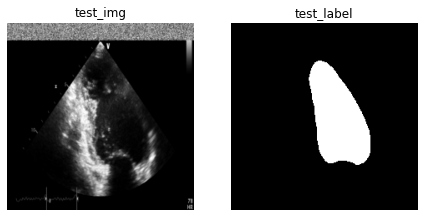

In [73]:
# 학습 데이터 확인
import matplotlib.pyplot as plt


n = np.random.randint(a2c_train_img.shape[0])
test_x = a2c_train_img[n]
test_y = a2c_train_label[n]


fig = plt.figure()
rows = 1; cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('test_img')
ax1.imshow(test_x.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('test_label')
ax2.imshow(test_y.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

fig.tight_layout()
plt.axis('off')
plt.show()

In [74]:
#a2c
a2c_norm_train_img = a2c_train_img / 255
a2c_norm_test_img = a2c_test_img / 255
#a4c
a4c_norm_train_img = a4c_train_img / 255
a4c_norm_test_img = a4c_test_img / 255

In [75]:

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, concatenate, Dropout

# UNet 모델 사용
def UNet(pretrained_weights = None,input_size = (IMAGE_SIZE,IMAGE_SIZE,1)):
    inp = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inp)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inp, outputs=[conv10])

    return model

In [76]:
a2c_model = UNet()
a4c_model = UNet()

In [77]:
def dice_coef(y_true, y_pred, smooth=0):

    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(tf.math.round(y_pred))
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def jaccard(y_true, y_pred, smooth=0):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(tf.math.round(y_pred))
    intersection = K.sum(y_true_f * y_pred_f)
    return ( intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection  + smooth)


#loss 함수
def dice_loss(y_true, y_pred, smooth = 1e-7):
    # binary cross entropy loss
    bce = tf.keras.losses.BinaryCrossentropy()
    bce_loss = bce(y_true, y_pred)

    y_true = tf.cast(y_true, tf.float32)

    dice = dice_coef(y_true, y_pred, smooth=1)
    # dice loss
    dice_loss = 1.0 - dice
    # total loss
    loss = bce_loss + dice_loss
    return loss


def jaccard_loss(y_true, y_pred, smooth = 1e-7):
    # binary cross entropy loss
    bce = tf.keras.losses.BinaryCrossentropy()
    bce_loss = bce(y_true, y_pred)

    y_true = tf.cast(y_true, tf.float32)

    jaccard_ = jaccard(y_true, y_pred, smooth=1)
    # dice loss
    jaccard__loss = 1.0 - dice
    # total loss
    loss = bce_loss + jaccard__loss
    return loss

# 원래 라벨 사이즈로 resize 만드는 함수
def make_res_label(test_img, row_label, model):
    norm_img = test_img/255
    int_pred_label = model.predict(norm_img)
    resize_label = []
    for idx, label in enumerate(row_label):
        pred = int_pred_label[idx]
        pred = np.where(pred >= 0.44, 1, pred)
        pred = np.where(pred <= 0.44, 0, pred)
        pred = pred.reshape(pred.shape[0], pred.shape[1])
        pred = cv2.resize(pred, dsize=(label.shape[1], label.shape[0]))
        resize_label.append(pred)
    return resize_label




# 이미지별 DSC, JI 측정 후 평균 함수
def make_DSC_JI(pred_list, true_list):

    def dice_jaccard(pred, true):
        y_true_f = true.flatten()
        y_pred_f = pred.flatten()
        intersection = np.sum(y_true_f * y_pred_f)
        dice = (intersection * 2.0) / (np.sum(y_true_f) + np.sum(y_pred_f))
        jaccard = intersection / (np.sum(y_true_f) + np.sum(y_pred_f) - intersection)
        return dice, jaccard

    dice_list = []
    jaccard_list = []

    for i in range(len(pred_list)):
        pred = pred_list[i]
        true = true_list[i]
        a, b = dice_jaccard(pred, true)
        dice_list.append(a)
        jaccard_list.append(b)

    return np.mean(dice_list), np.mean(jaccard_list)

## a2c 모델 학습하기

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight


a2c_model.compile(optimizer = Adam(learning_rate = 1e-4), 
#               loss = dice_loss, 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              sample_weight_mode="temporal",
              metrics = ['accuracy',
                         dice_coef,
                         jaccard])


callback_list = [
        tf.keras.callbacks.EarlyStopping( 
        monitor='val_loss',
        patience=10       
    ),
    #     tf.keras.callbacks.ModelCheckpoint( 
    #     filepath="my_model.h5",
    #     monitor='val_loss',
    #     save_best_only=True
    # )
]

def add_sample_weights( label):
    class_weights = tf.constant([20. , 1.])
    class_weights = class_weights/tf.reduce_sum(class_weights)
    sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))
    return sample_weights


sample_weights = add_sample_weights(a2c_train_label)



a2c_model_history = a2c_model.fit(a2c_norm_train_img, a2c_train_label,
                            epochs=1000,
                            batch_size=1,
#                             sample_weight = sample_weights, 
                            validation_split = 0.2,
                            callbacks=callback_list
                            )

Epoch 1/1000
640/640 [==============================] - 1043s 2s/step - loss: 0.6788 - accuracy: 0.9540 - dice_coef: 1.4298e-04 - jaccard: 7.4431e-05 - val_loss: 0.6648 - val_accuracy: 0.9543 - val_dice_coef: 0.0000e+00 - val_jaccard: 0.0000e+00
Epoch 2/1000
640/640 [==============================] - 1039s 2s/step - loss: 0.6511 - accuracy: 0.9553 - dice_coef: 0.0000e+00 - jaccard: 0.0000e+00 - val_loss: 0.6378 - val_accuracy: 0.9543 - val_dice_coef: 0.0000e+00 - val_jaccard: 0.0000e+00
Epoch 3/1000
 64/640 [==>...........................] - ETA: 14:38 - loss: 0.6364 - accuracy: 0.9556 - dice_coef: 0.0000e+00 - jaccard: 0.0000e+00

In [ ]:
# 학습 결과 확인

n = np.random.randint(a2c_test_img.shape[0])
a2c_img_predict = model.predict(a2c_norm_test_img[n:n+1])

test_x = a2c_test_img[n]

fig = plt.figure()
rows = 1; cols = 3


ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('test_img')
ax1.imshow(test_x, cmap='gray')
plt.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('test_label')
ax2.imshow(test_label[n], cmap='gray')
plt.axis('off')

ax3 = fig.add_subplot(rows, cols, 3)
ax3.set_title('predict_label')
ax3.imshow(np.around(a2c_img_predict[0])*255, cmap='gray')
plt.axis('off')

fig.tight_layout()

plt.show()

In [ ]:
import gc
import tensorflow as tf
tf.keras.backend.clear_session()
gc.collect()

In [ ]:
# 로컬에서 돌릴시 메모리 부족문제로 테스트셋 분할로 평가
# model.evaluate(norm_test_img, test_label)


a2c_model.evaluate(a2c_norm_test_img[:33], a2c_test_label[:33])

In [ ]:
a2c_model.evaluate(a2c_norm_test_img[33:66], a2c_test_label[33:66])

In [ ]:
a2c_model.evaluate(a2c_norm_test_img[66:], a2c_test_label[66:])

In [ ]:
# 모델 학습 정확도 확인


import matplotlib.pyplot as plt 

figs, loss_ax = plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(a2c_model_history.history['loss'],'y',label='train loss')
loss_ax.plot(a2c_model_history.history['val_loss'],'r',label='val loss')

acc_ax.plot(a2c_model_history.history['accuracy'],'b',label='train acc')
acc_ax.plot(a2c_model_history.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

In [ ]:
# 모델 학습 정확도 확인


import matplotlib.pyplot as plt 

figs, loss_ax = plt.subplots()

loss_ax.plot(a2c_model_history.history['dice_coef'],'y',label='dice')
loss_ax.plot(a2c_model_history.history['jaccard'],'r',label='jaccard')


loss_ax.set_xlabel('epoch')


plt.show()

##a4c 모델 학습하기

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight


a4c_model.compile(optimizer = Adam(learning_rate = 1e-4), 
#               loss = dice_loss, 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              sample_weight_mode="temporal",
              metrics = ['accuracy',
                         dice_coef,
                         jaccard])


callback_list = [
        tf.keras.callbacks.EarlyStopping( 
        monitor='val_loss',
        patience=10       
    ),
    #     tf.keras.callbacks.ModelCheckpoint( 
    #     filepath="my_model.h5",
    #     monitor='val_loss',
    #     save_best_only=True
    # )
]

def add_sample_weights( label):
    class_weights = tf.constant([20. , 1.])
    class_weights = class_weights/tf.reduce_sum(class_weights)
    sample_weights = tf.gather(class_weights, indices=tf.cast(label, tf.int32))
    return sample_weights


sample_weights = add_sample_weights(a4c_train_label)



model_history = a4c_model.fit(a4c_norm_train_img, a4c_train_label,
                            epochs=1000,
                            batch_size=1,
#                             sample_weight = sample_weights, 
                            validation_split = 0.2,
                            callbacks=callback_list
                            )

In [ ]:
# 학습 결과 확인

n = np.random.randint(a4c_test_img.shape[0])
a4c_img_predict = model.predict(a4c_norm_test_img[n:n+1])

test_x = a4c_test_img[n]

fig = plt.figure()
rows = 1; cols = 3


ax1 = fig.add_subplot(rows, cols, 1)
ax1.set_title('test_img')
ax1.imshow(test_x, cmap='gray')
plt.axis('off')

ax2 = fig.add_subplot(rows, cols, 2)
ax2.set_title('test_label')
ax2.imshow(test_label[n], cmap='gray')
plt.axis('off')

ax3 = fig.add_subplot(rows, cols, 3)
ax3.set_title('predict_label')
ax3.imshow(np.around(a4c_img_predict[0])*255, cmap='gray')
plt.axis('off')

fig.tight_layout()

plt.show()

In [ ]:
import gc
import tensorflow as tf
tf.keras.backend.clear_session()
gc.collect()

In [ ]:
# 로컬에서 돌릴시 메모리 부족문제로 테스트셋 분할로 평가
# model.evaluate(norm_test_img, test_label)


a4c_model.evaluate(a4c_norm_test_img[:33], a4c_test_label[:33])

In [ ]:
# 모델 학습 정확도 확인


import matplotlib.pyplot as plt 

figs, loss_ax = plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(a4c_model_history.history['loss'],'y',label='train loss')
loss_ax.plot(a4c_model_history.history['val_loss'],'r',label='val loss')

acc_ax.plot(a4c_model_history.history['accuracy'],'b',label='train acc')
acc_ax.plot(a4c_model_history.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

plt.show()

In [ ]:
# 모델 학습 정확도 확인


import matplotlib.pyplot as plt 

figs, loss_ax = plt.subplots()

loss_ax.plot(a4c_model_history.history['dice_coef'],'y',label='dice')
loss_ax.plot(a4c_model_history.history['jaccard'],'r',label='jaccard')


loss_ax.set_xlabel('epoch')


plt.show()

## 테스트 블록입니다.

## 모델 가중치 저장

In [36]:
a2c_model.save_weights('a2c_weight.h5')

In [35]:
a4c_model.save_weights('a4c_weight.h5')

##가중치 불러와서 모델 테스트하기

In [ ]:
model2 = UNet()#각 모델의 객체 생성, 가가 들어가는 가중치가 달라서 겹치면 안된다
model4 = UNet()

In [40]:
#a2c_model = load_model('/content/drive/MyDrive/의료인공지능 공모전/echocardiography_analysis_image/a2c_bce_loss_model_best_2.h5',custom_objects={'dice_coef':dice_coef, 'jaccard':jaccard})
#a4c_model = load_model('/content/drive/MyDrive/의료인공지능 공모전/echocardiography_analysis_image/a4c_bce_loss_model_base_best.h5',custom_objects={'dice_coef':dice_coef, 'jaccard':jaccard})

In [70]:
model2.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics = ['accuracy',
                         dice_coef,
                         jaccard])
model4.compile(optimizer = Adam(learning_rate = 1e-4), 
              loss = tf.keras.losses.BinaryCrossentropy(), 
              metrics = ['accuracy',
                         dice_coef,
                         jaccard])



a2c_pred_label = make_res_label(a2c_img, a2c_row_label, model2) # 최종 a2c 라벨
a4c_pred_label = make_res_label(a4c_img, a4c_row_label, model4) # 최종 a4c 라벨


a2c_DSC, a2c_JI = make_DSC_JI(a2c_row_label, a2c_pred_label)
a4c_DSC, a4c_JI = make_DSC_JI(a4c_row_label, a4c_pred_label)

In [30]:
print(f'a2c_DSC : {a2c_DSC}, a2c_JI : {a2c_JI}')
print(f'a4c_DSC : {a4c_DSC}, a4c_JI : {a4c_JI}')

a2c_DSC : 0.9448588318157719, a2c_JI : 0.8978463875943845
a4c_DSC : 0.9578616103830556, a4c_JI : 0.9204662000419926


In [31]:
a2c_model.evaluate(a2c_img/255, a2c_label)

4/4 [==============================] - 37s 8s/step - loss: 0.0123 - accuracy: 0.9953 - dice_coef: 0.9535 - jaccard: 0.9114


[0.012305477634072304,
 0.9953113198280334,
 0.9534980058670044,
 0.9114193916320801]

In [32]:
a4c_model.evaluate(a4c_img/255, a4c_label)

4/4 [==============================] - 38s 9s/step - loss: 0.0131 - accuracy: 0.9968 - dice_coef: 0.9673 - jaccard: 0.9367


[0.013106698170304298,
 0.9967855215072632,
 0.9673000574111938,
 0.9367231726646423]